___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [3]:
df = pd.read_csv("Mall_Customers.csv", index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [ ]:
df.loc[:,['Age','Spending_Score']]

In [15]:
df.rename(columns={"Annual Income (k$)":"annual_income", "Spending Score (1-100)":"score", "Gender":"gender", "Age":"age"}, inplace=True)

In [16]:
df.head()

,gender,age,annual_income,score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [105]:
df.shape

(200, 4)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         200 non-null    object
 1   age            200 non-null    int64 
 2   annual_income  200 non-null    int64 
 3   score          200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [107]:
df.describe()

,age,annual_income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [25]:
df = pd.get_dummies(df, drop_first=True)
df.rename(columns={"gender_Male":"gender"}, inplace=True)

In [109]:
df.head()

,age,annual_income,score,gender
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


ValueError: Could not interpret input 'gender'

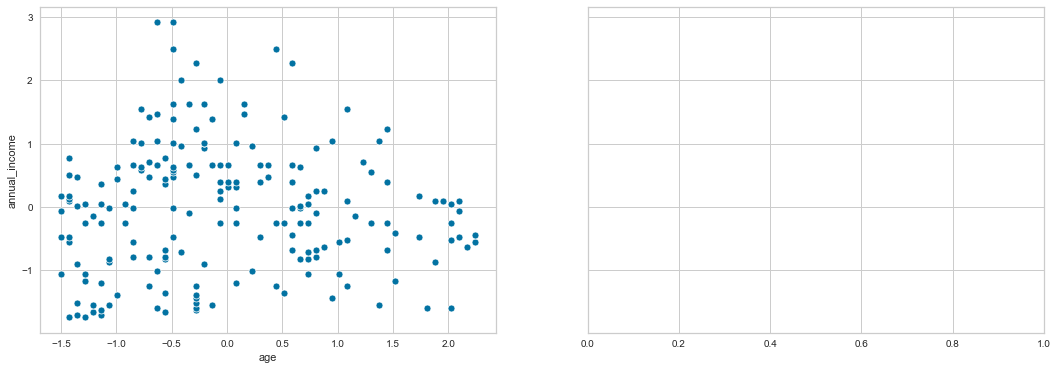

In [77]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(18,6))
sns.scatterplot(x="age", y="annual_income", data=df, ax=ax[0])
sns.scatterplot(x="age", y="annual_income", hue="gender", data=df, ax=ax[1])

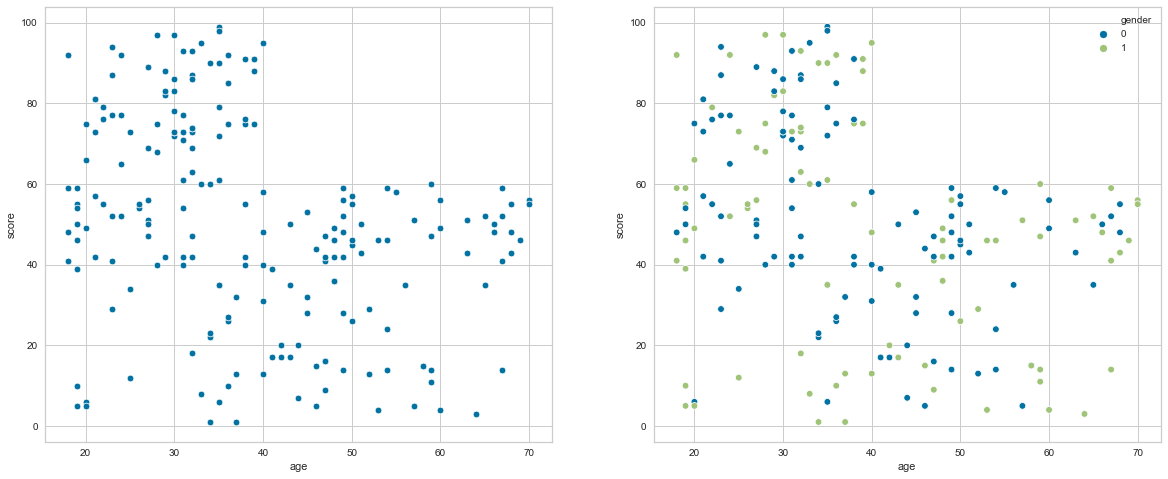

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.scatterplot(x="age", y="score", data=df, ax=ax[0], s=45)
sns.scatterplot(x="age", y="score", hue="gender", data=df, ax=ax[1], s=45)

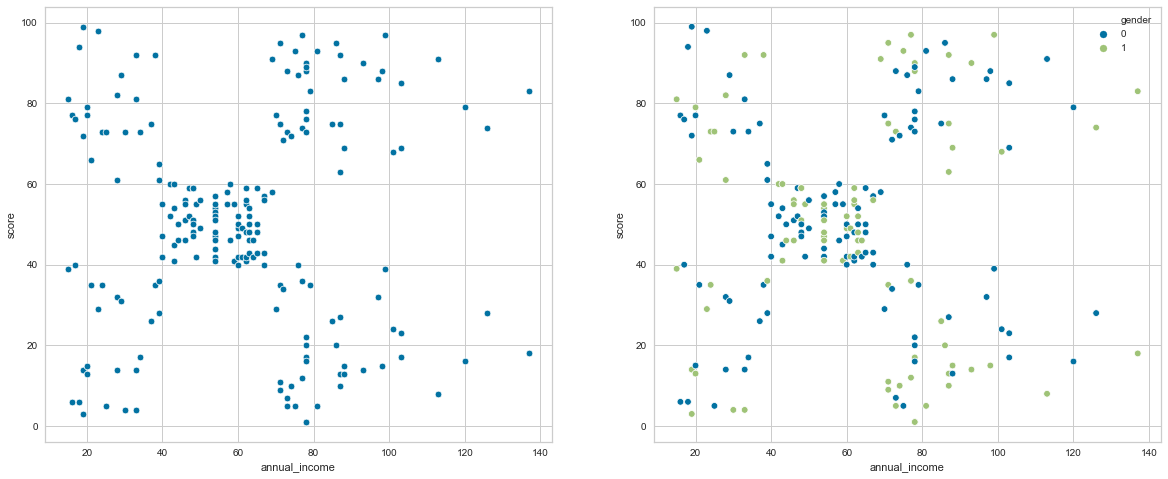

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.scatterplot(x="annual_income", y="score", data=df, ax=ax[0], s=45)
sns.scatterplot(x="annual_income", y="score", hue="gender", data=df, ax=ax[1], s=45)

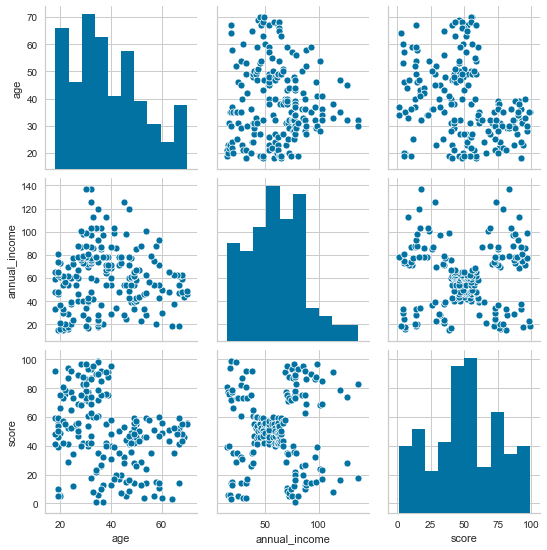

In [18]:
sns.pairplot(df.drop("gender", axis=1))

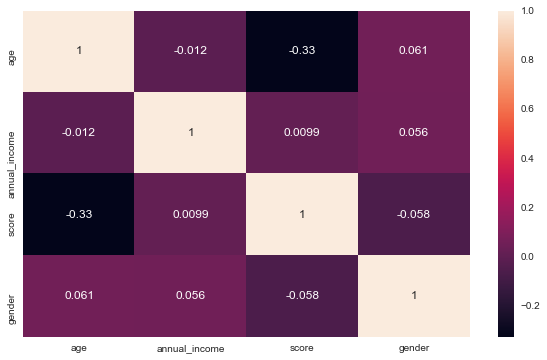

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [20]:
df.describe()

,age,annual_income,score,gender
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


In [78]:
scale = StandardScaler()

In [79]:
data = scale.fit_transform(df)

In [80]:
df = pd.DataFrame(data, columns=["age", "annual_income", "score", "gender"])

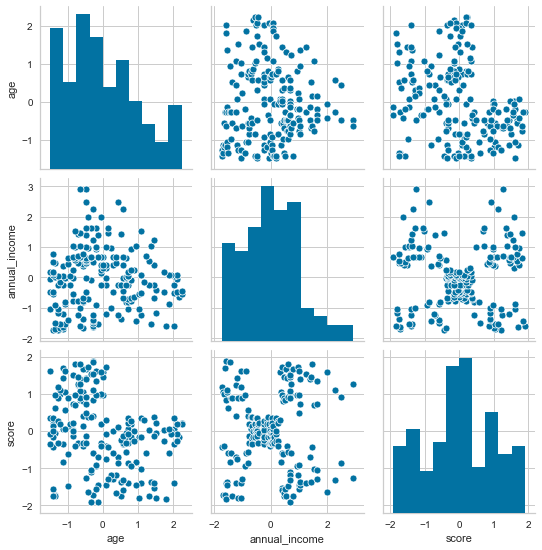

In [24]:
sns.pairplot(df.drop("gender", axis=1))

In [25]:
df.describe()

,age,annual_income,score,gender
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16,1.554312e-17
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,-8.864053e-01
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,-8.864053e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,-8.864053e-01
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.128152e+00
max,2.235532e+00,2.917671e+00,1.894492e+00,1.128152e+00


In [26]:
# If Hopkins test result higher than 0.3 or 0.5, data is not suitable for clustering
hopkins(df, df.shape[0])

0.2578491339551929

In [57]:
df.drop("gender", axis=1, inplace=True)

In [60]:
df.head()

,age,annual_income,score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Text(0.5, 1.0, 'K Values vs. Error')

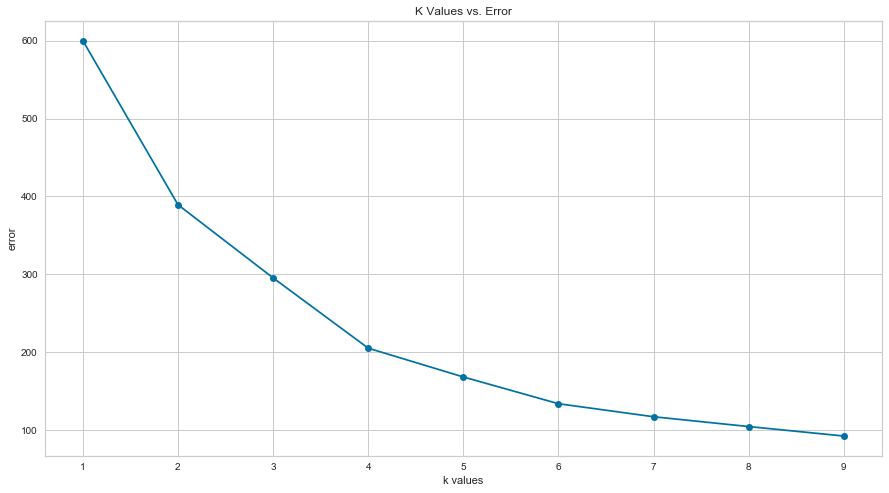

In [61]:
error = list()
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    error.append(kmeans.inertia_)


plt.figure(figsize=(15,8))
plt.plot(range(1,10), error,"bo-")
plt.xlabel("k values")
plt.ylabel("error")
plt.title("K Values vs. Error")

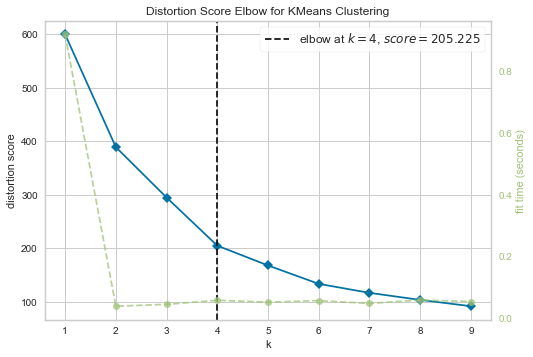

In [62]:
visualizer = KElbowVisualizer(KMeans(), k=(1,10),locate_elbow=True)
visualizer.fit(df)
visualizer.show()

In [64]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
silhouette_score(df, kmeans.labels_)

0.4039582785148566

In [63]:
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    print(f"K Means Clustering : n={i} and Silhouette Score =",silhouette_score(df, kmeans.labels_))

K Means Clustering : n=2 and Silhouette Score = 0.33547192894004574
K Means Clustering : n=3 and Silhouette Score = 0.357793388710272
K Means Clustering : n=4 and Silhouette Score = 0.4039582785148566
K Means Clustering : n=5 and Silhouette Score = 0.41664341513732767
K Means Clustering : n=6 and Silhouette Score = 0.4268547747113388
K Means Clustering : n=7 and Silhouette Score = 0.417231894954916
K Means Clustering : n=8 and Silhouette Score = 0.4100960228678141
K Means Clustering : n=9 and Silhouette Score = 0.42095871441088095
K Means Clustering : n=10 and Silhouette Score = 0.4010874140478927
K Means Clustering : n=11 and Silhouette Score = 0.4082289493171363
K Means Clustering : n=12 and Silhouette Score = 0.3877724704128936
K Means Clustering : n=13 and Silhouette Score = 0.37914221901047684
K Means Clustering : n=14 and Silhouette Score = 0.35614666130977496
K Means Clustering : n=15 and Silhouette Score = 0.3600108276953566
K Means Clustering : n=16 and Silhouette Score = 0.36

Text(0.5, 1.0, 'Clusters for Age and Score')

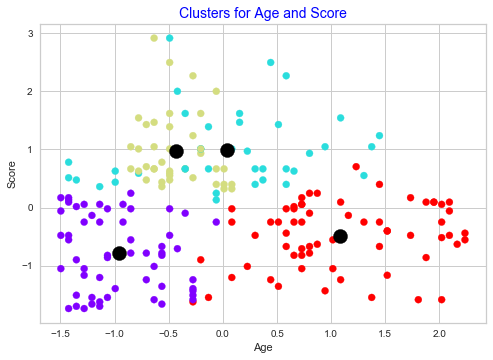

In [66]:
df["predicted_class"] = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df["predicted_class"], cmap="rainbow")
plt.scatter(centroids[:,0], centroids[:,1], c="black", s=200)
plt.xlabel("Age")
plt.ylabel("Score")
plt.title("Clusters for Age and Score", c="blue",size=14)

<Figure size 1080x576 with 0 Axes>

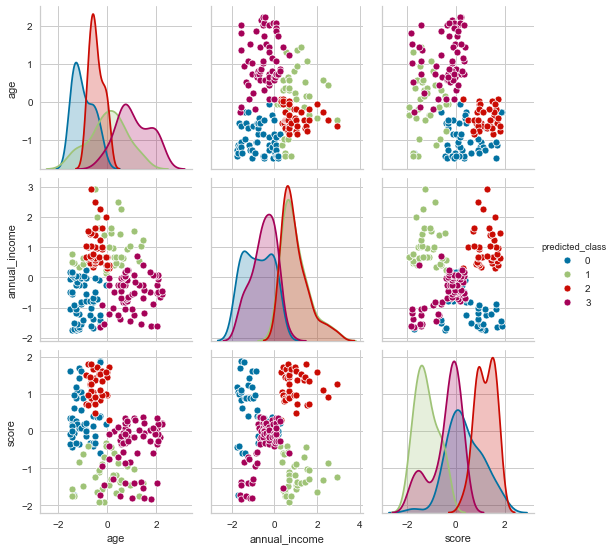

In [69]:
plt.figure(figsize=(15,8))
sns.pairplot(df, hue="predicted_class")

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [36]:
df2 = df[["age", "score"]]
df2.head()

,age,score
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'K Values vs. Inertia')

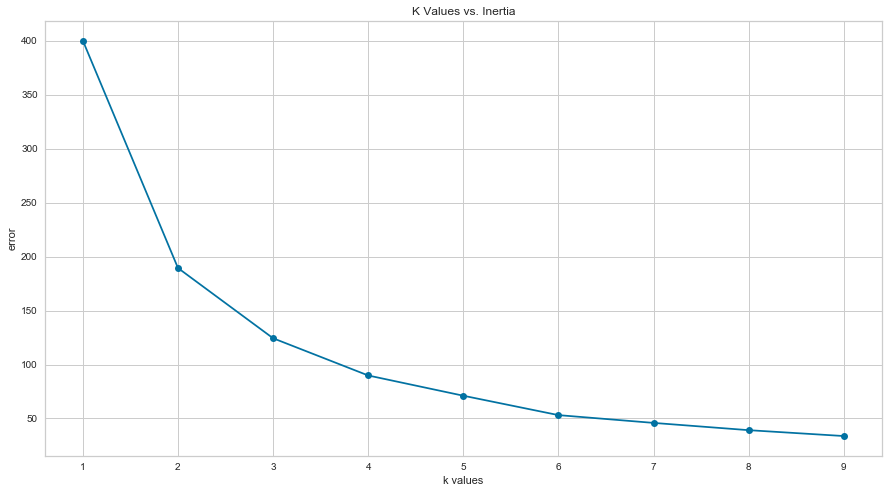

In [37]:
inertia = list()
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1,10), inertia,"bo-")
plt.xlabel("k values")
plt.ylabel("error")
plt.title("K Values vs. Inertia")

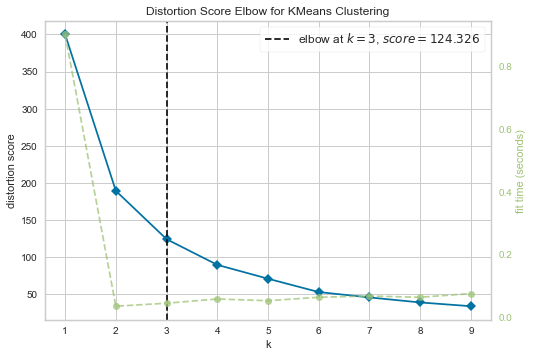

In [38]:
#Yellowbrick representation
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(df2)
visualizer.show()

#### *iii. Apply K Means*

In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)
print("Inertia for (n_clusters=3):", kmeans.inertia_)

Inertia for (n_clusters=3): 124.32628617921526


#### *iv. Visualizing and Labeling All the Clusters*

In [41]:
df2["labels"] = kmeans.labels_

In [44]:
kmeans.cluster_centers_

array([[ 1.23658636, -0.38408299],
       [-0.28826287, -0.98405467],
       [-0.72740666,  0.9160964 ]])

Text(0.5, 1.0, 'Clusters for Age and Score')

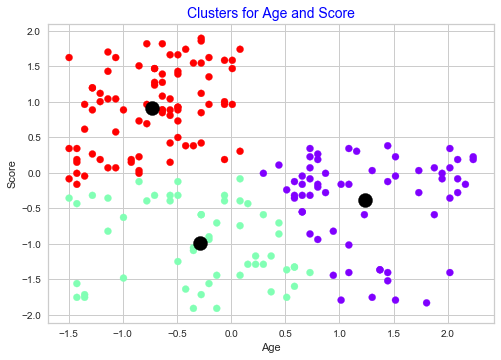

In [45]:
df2["predicted_class"] = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c=df2["predicted_class"], cmap="rainbow")
plt.scatter(centroids[:,0], centroids[:,1], c="black", s=200)
plt.xlabel("Age")
plt.ylabel("Score")
plt.title("Clusters for Age and Score", c="blue",size=14)

In [46]:
print(f"Silhouette Score (n_clusters=3):", silhouette_score(df2, kmeans.labels_))

Silhouette Score (n_clusters=3): 0.5276474875718407


In [47]:
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    print(f"K Means Clustering : n={i} and Silhouette Score =",silhouette_score(df2, kmeans.labels_))

K Means Clustering : n=2 and Silhouette Score = 0.5151438573347574
K Means Clustering : n=3 and Silhouette Score = 0.5276474875718407
K Means Clustering : n=4 and Silhouette Score = 0.4372668464564525
K Means Clustering : n=5 and Silhouette Score = 0.4392122272914072
K Means Clustering : n=6 and Silhouette Score = 0.4188929014742543
K Means Clustering : n=7 and Silhouette Score = 0.45113974771114795
K Means Clustering : n=8 and Silhouette Score = 0.45416142950722205
K Means Clustering : n=9 and Silhouette Score = 0.44522165387045726
K Means Clustering : n=10 and Silhouette Score = 0.4618956824058937
K Means Clustering : n=11 and Silhouette Score = 0.47803559578719684
K Means Clustering : n=12 and Silhouette Score = 0.4886350643684429
K Means Clustering : n=13 and Silhouette Score = 0.47617358492272827
K Means Clustering : n=14 and Silhouette Score = 0.4509591674448562
K Means Clustering : n=15 and Silhouette Score = 0.4356827589711365
K Means Clustering : n=16 and Silhouette Score = 0.

In [48]:
hopkins(df2, df2.shape[0])

0.12562288999254845

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [49]:
df3 = df[["annual_income", "score"]]
df3.head()

,annual_income,score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'K Values vs. Inertia')

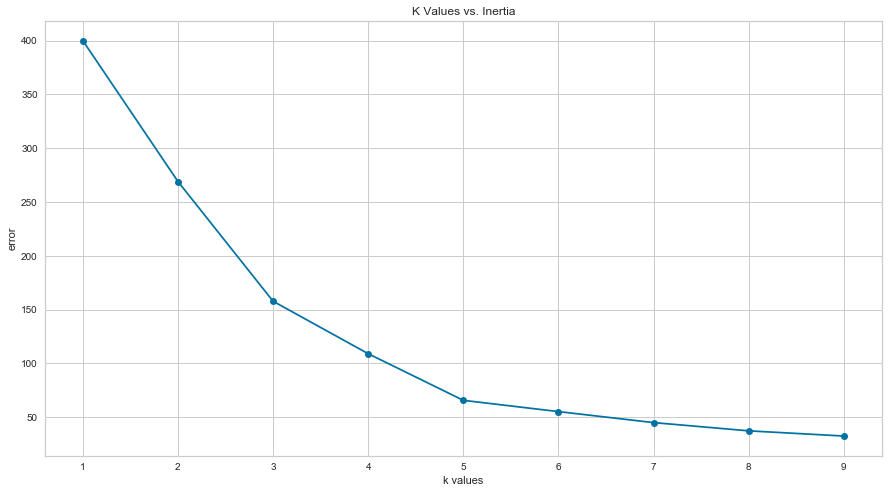

In [50]:
inertia = list()
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1,10), inertia,"bo-")
plt.xlabel("k values")
plt.ylabel("error")
plt.title("K Values vs. Inertia")

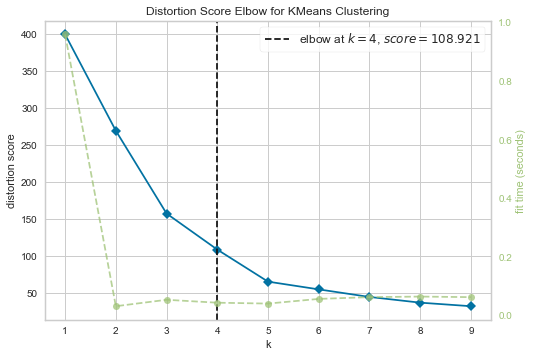

In [51]:
#Yellowbrick representation
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(df3)
visualizer.show()

#### *iii. Apply K Means*

In [54]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df3)
print("Inertia for (n_clusters=4):", kmeans.inertia_)

Inertia for (n_clusters=4): 65.79788051130147


#### *iv. Visualizing and Labeling All the Clusters*

Text(0.5, 1.0, 'Clusters for Annual Income and Score')

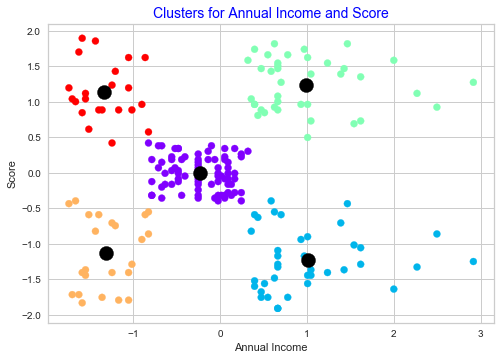

In [55]:
df3["predicted_class"] = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df3.iloc[:,0], df3.iloc[:,1], c=df3["predicted_class"], cmap="rainbow")
plt.scatter(centroids[:,0], centroids[:,1], c="black", s=200)
plt.xlabel("Annual Income")
plt.ylabel("Score")
plt.title("Clusters for Annual Income and Score", c="blue",size=14)

In [56]:
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df3)
    print(f"K Means Clustering : n={i} and Silhouette Score =",silhouette_score(df3, kmeans.labels_))

K Means Clustering : n=2 and Silhouette Score = 0.5199482126702235
K Means Clustering : n=3 and Silhouette Score = 0.5608302498811653
K Means Clustering : n=4 and Silhouette Score = 0.63900450725103
K Means Clustering : n=5 and Silhouette Score = 0.6929946784669909
K Means Clustering : n=6 and Silhouette Score = 0.6567256300124575
K Means Clustering : n=7 and Silhouette Score = 0.6315991963415771
K Means Clustering : n=8 and Silhouette Score = 0.515119319995613
K Means Clustering : n=9 and Silhouette Score = 0.49303719064758433
K Means Clustering : n=10 and Silhouette Score = 0.48198153581798225
K Means Clustering : n=11 and Silhouette Score = 0.4814350052627219
K Means Clustering : n=12 and Silhouette Score = 0.44571891671430414
K Means Clustering : n=13 and Silhouette Score = 0.4376301419163741
K Means Clustering : n=14 and Silhouette Score = 0.4386313721830998
K Means Clustering : n=15 and Silhouette Score = 0.44397452686014516
K Means Clustering : n=16 and Silhouette Score = 0.4417

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

In [21]:
pip install pyclustertend

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn import datasets
from pyclustertend import hopkins
from sklearn.preprocessing import scale
hc_ward = linkage(df, "ward")
hc_complete = linkage(df, "complete")

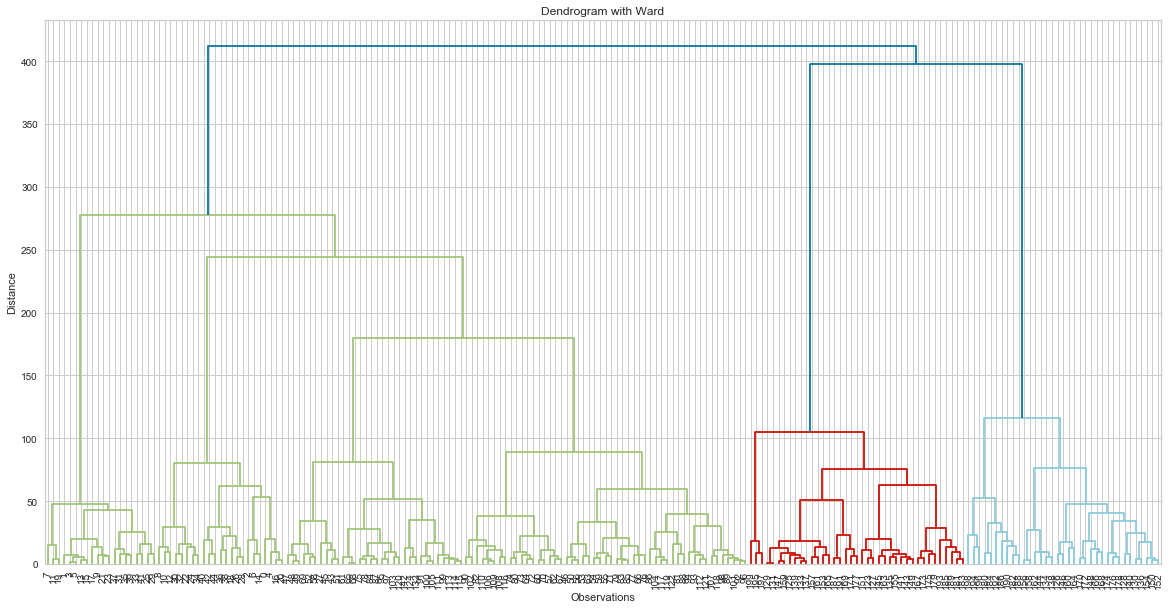

In [27]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10);

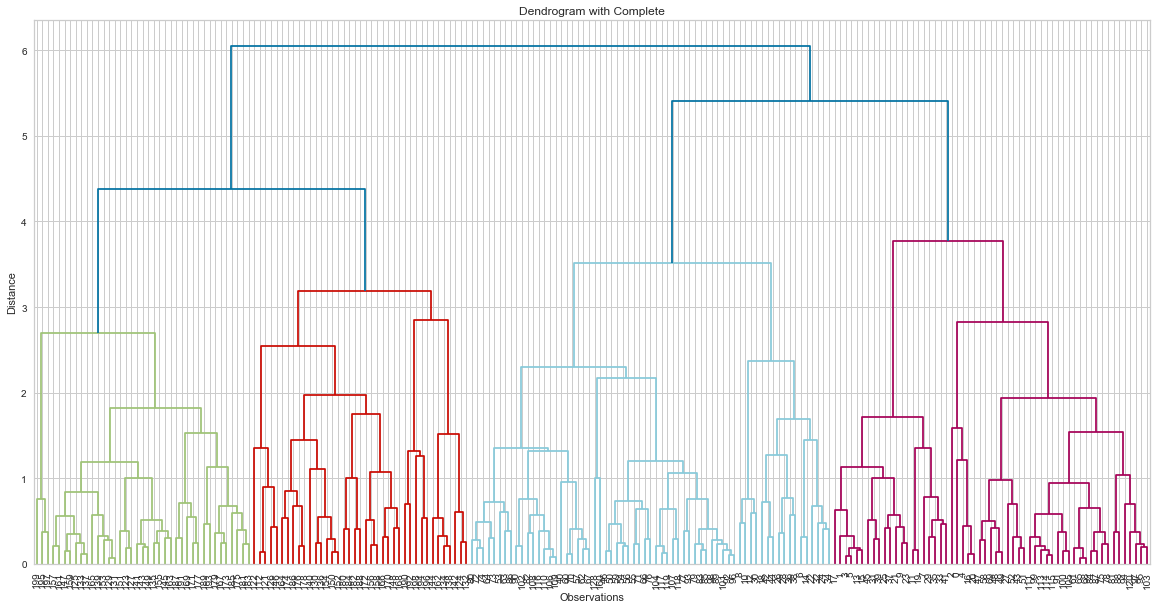

In [83]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10);

#### ii. *Apply Agglomerative Clustering*

In [28]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
cluster.fit(df)
cluster.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [29]:
df.head(1)

,age,annual_income,score,gender
CustomerID,,,,
1,19,15,39,1


#### iii. *Visualizing and Labeling All the Clusters* 

Text(0.5, 1.0, 'Clusters by Hierarchical Clustering')

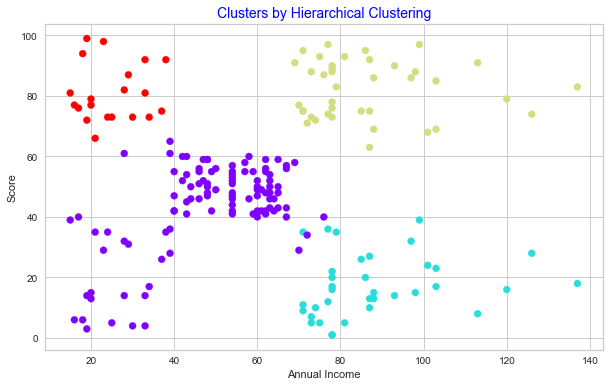

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df.iloc[:,1], df.iloc[:,2], c=cluster.labels_ , cmap="rainbow")
plt.xlabel("Annual Income")
plt.ylabel("Score")
plt.title("Clusters by Hierarchical Clustering", c="blue", size=14)

--

In [31]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="complete")
cluster.fit(df)
cluster.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

Text(0.5, 1.0, 'Clusters by Hierarchical Clustering')

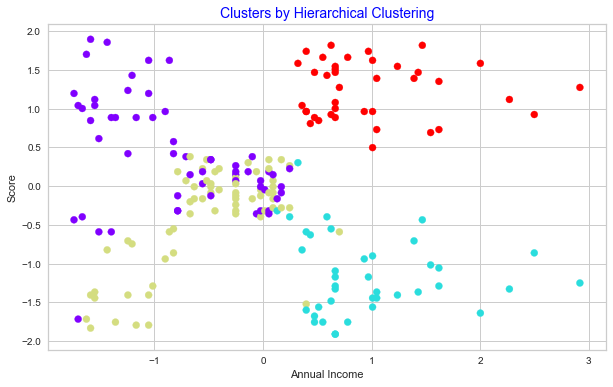

In [99]:
plt.figure(figsize=(10,6))
plt.scatter(df.iloc[:,1], df.iloc[:,2], c=cluster.labels_ , cmap="rainbow")
plt.xlabel("Annual Income")
plt.ylabel("Score")
plt.title("Clusters by Hierarchical Clustering", c="blue", size=14)

In [32]:
for i in range(2,10):
    cluster = AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward")
    cluster.fit(df)
    print(f"Silhouette Score (n_clusters={i} & linkage='complete'):", silhouette_score(df, cluster.labels_) )

Silhouette Score (n_clusters=2 & linkage='complete'): 0.29916602844367
Silhouette Score (n_clusters=3 & linkage='complete'): 0.3812859576468096
Silhouette Score (n_clusters=4 & linkage='complete'): 0.4102091359195185
Silhouette Score (n_clusters=5 & linkage='complete'): 0.43997527212476695
Silhouette Score (n_clusters=6 & linkage='complete'): 0.4428008535928764
Silhouette Score (n_clusters=7 & linkage='complete'): 0.42593881050851595
Silhouette Score (n_clusters=8 & linkage='complete'): 0.4223297424559345
Silhouette Score (n_clusters=9 & linkage='complete'): 0.37773214836148283


In [33]:
for i in range(2,10):
    cluster = AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="complete")
    cluster.fit(df)
    print(f"Silhouette Score (n_clusters={i} & linkage='complete'):", silhouette_score(df, cluster.labels_) )

Silhouette Score (n_clusters=2 & linkage='complete'): 0.29916602844367
Silhouette Score (n_clusters=3 & linkage='complete'): 0.3812859576468096
Silhouette Score (n_clusters=4 & linkage='complete'): 0.4102091359195185
Silhouette Score (n_clusters=5 & linkage='complete'): 0.43997527212476695
Silhouette Score (n_clusters=6 & linkage='complete'): 0.42326551539571566
Silhouette Score (n_clusters=7 & linkage='complete'): 0.4141207457542422
Silhouette Score (n_clusters=8 & linkage='complete'): 0.40427130368326564
Silhouette Score (n_clusters=9 & linkage='complete'): 0.3890365195337613


In [ ]:
df.loc[]

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___